In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_excel(r"F:\misc\UPASI Project\final\\DailyMet.xlsx")
df.head(10)

,Year,Month,Day,Temperature min,Temperature max,Humidity 8:30,Humidity 2:30,Rainfall Inches,Rainfall mm
0,1952,1,1,5,23.888889,NaN,NaN,0,0.000
1,1952,1,2,9.44444,23.888889,NaN,NaN,0.85,21.590
2,1952,1,3,13.3333,25.000000,NaN,NaN,0,0.000
3,1952,1,4,12.2222,22.777778,NaN,NaN,0,0.000
4,1952,1,5,9.44444,22.777778,NaN,NaN,0,0.000
5,1952,1,6,16.1111,25.555556,NaN,NaN,0,0.000
6,1952,1,7,16.1111,19.444444,NaN,NaN,0,0.000
7,1952,1,8,7.77778,22.777778,NaN,NaN,0,0.000
8,1952,1,9,10,23.333333,NaN,NaN,0,0.000
9,1952,1,10,7.77778,24.444444,NaN,NaN,0.04,1.016


In [7]:
df["Humidity 8:30"]=df["Humidity 8:30"].astype(float)
df["Humidity 2:30"]=df["Humidity 2:30"].astype(float)
df.head()

,Year,Month,Day,Temperature min,Temperature max,Humidity 8:30,Humidity 2:30,Rainfall Inches,Rainfall mm
0,1952,1,1,5,23.888889,NaN,NaN,0,0.00
1,1952,1,2,9.44444,23.888889,NaN,NaN,0.85,21.59
2,1952,1,3,13.3333,25.000000,NaN,NaN,0,0.00
3,1952,1,4,12.2222,22.777778,NaN,NaN,0,0.00
4,1952,1,5,9.44444,22.777778,NaN,NaN,0,0.00


In [8]:
df.drop(df[(df['Day']>28) & (df['Month']==2) & (df['Year']%4!=0)].index,inplace=True)
df.drop(df[(df['Day']>29) & (df['Month']==2) & (df['Year']%4==0)].index,inplace=True)
df.drop(df[(df['Day']>30) & ((df['Month']==4)|(df['Month']==6)|(df['Month']==9)|(df['Month']==11))].index,inplace=True)

In [9]:
date = [str(y)+'-'+str(m)+'-'+str(d) for y, m, d in zip(df.Year, df.Month, df.Day)]

In [10]:
df.index = pd.to_datetime(date)

In [11]:
df['date'] = df.index
df['dayofyear']=df['date'].dt.dayofyear
df.drop('date',axis=1,inplace=True)

In [12]:
df.head()

,Year,Month,Day,Temperature min,Temperature max,Humidity 8:30,Humidity 2:30,Rainfall Inches,Rainfall mm,dayofyear
1952-01-01,1952,1,1,5,23.888889,NaN,NaN,0,0.00,1
1952-01-02,1952,1,2,9.44444,23.888889,NaN,NaN,0.85,21.59,2
1952-01-03,1952,1,3,13.3333,25.000000,NaN,NaN,0,0.00,3
1952-01-04,1952,1,4,12.2222,22.777778,NaN,NaN,0,0.00,4
1952-01-05,1952,1,5,9.44444,22.777778,NaN,NaN,0,0.00,5


In [13]:
df.size


251950

In [14]:
df['Humidity'] = df[['Humidity 8:30', 'Humidity 2:30']].mean(axis=1)


In [15]:
df.head()

,Year,Month,Day,Temperature min,Temperature max,Humidity 8:30,Humidity 2:30,Rainfall Inches,Rainfall mm,dayofyear,Humidity
1952-01-01,1952,1,1,5,23.888889,NaN,NaN,0,0.00,1,NaN
1952-01-02,1952,1,2,9.44444,23.888889,NaN,NaN,0.85,21.59,2,NaN
1952-01-03,1952,1,3,13.3333,25.000000,NaN,NaN,0,0.00,3,NaN
1952-01-04,1952,1,4,12.2222,22.777778,NaN,NaN,0,0.00,4,NaN
1952-01-05,1952,1,5,9.44444,22.777778,NaN,NaN,0,0.00,5,NaN


In [16]:
df.fillna(0, inplace=True)

In [17]:
df

,Year,Month,Day,Temperature min,Temperature max,Humidity 8:30,Humidity 2:30,Rainfall Inches,Rainfall mm,dayofyear,Humidity
1952-01-01,1952,1,1,5,23.888889,0.0,0.0,0,0.000,1,0.0
1952-01-02,1952,1,2,9.44444,23.888889,0.0,0.0,0.85,21.590,2,0.0
1952-01-03,1952,1,3,13.3333,25.000000,0.0,0.0,0,0.000,3,0.0
1952-01-04,1952,1,4,12.2222,22.777778,0.0,0.0,0,0.000,4,0.0
1952-01-05,1952,1,5,9.44444,22.777778,0.0,0.0,0,0.000,5,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,2020,12,27,1,24.000000,87.0,59.0,0,0.000,362,73.0
2020-12-28,2020,12,28,7,25.000000,88.0,59.0,0,0.000,363,73.5
2020-12-29,2020,12,29,9,25.000000,89.0,75.0,Traces,0.000,364,82.0
2020-12-30,2020,12,30,13,24.000000,89.0,81.0,0,0.000,365,85.0


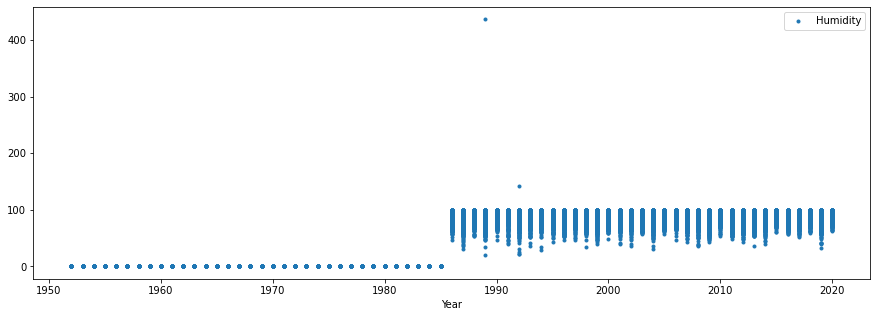

In [18]:
df.plot(x='Year',y='Humidity',style='.', figsize=(15,5))

In [19]:
df = df.loc[df["Year"] >= 1986]
df = df.loc[df["Humidity"] < 125]
df

,Year,Month,Day,Temperature min,Temperature max,Humidity 8:30,Humidity 2:30,Rainfall Inches,Rainfall mm,dayofyear,Humidity
1986-01-01,1986,1,1,3,22.0,85.0,55.0,0,0.000,1,70.0
1986-01-02,1986,1,2,5,26.0,86.0,61.0,0,0.000,2,73.5
1986-01-03,1986,1,3,3,23.0,86.0,35.0,0,0.000,3,60.5
1986-01-04,1986,1,4,5,23.0,85.0,61.0,0,0.000,4,73.0
1986-01-05,1986,1,5,4,23.0,86.0,75.0,0,0.000,5,80.5
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,2020,12,27,1,24.0,87.0,59.0,0,0.000,362,73.0
2020-12-28,2020,12,28,7,25.0,88.0,59.0,0,0.000,363,73.5
2020-12-29,2020,12,29,9,25.0,89.0,75.0,Traces,0.000,364,82.0
2020-12-30,2020,12,30,13,24.0,89.0,81.0,0,0.000,365,85.0


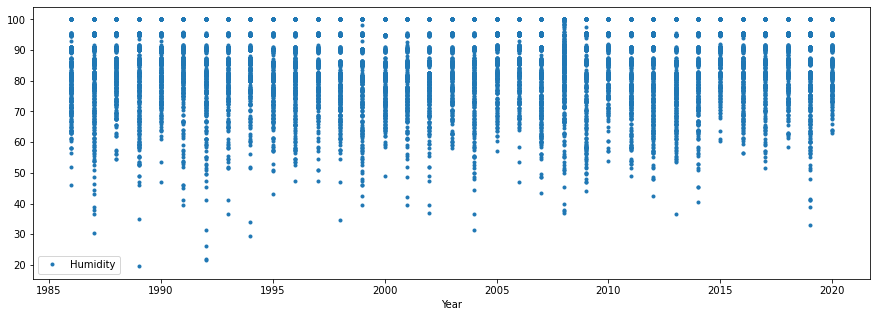

In [20]:
df.plot(x='Year',y='Humidity',style='.', figsize=(15,5))

In [21]:
train = df.loc[df['Year'] <=2012]
test = df.loc[df['Year'] == 2020]

In [22]:
X_train=train.drop(['Temperature min','Temperature max', 'Humidity 8:30', 'Humidity 2:30','Rainfall Inches', 'Rainfall mm', 'dayofyear'], axis=1)
Y_train=train['Humidity']

In [23]:
X_train.head()

,Year,Month,Day,Humidity
1986-01-01,1986,1,1,70.0
1986-01-02,1986,1,2,73.5
1986-01-03,1986,1,3,60.5
1986-01-04,1986,1,4,73.0
1986-01-05,1986,1,5,80.5


In [24]:
X_test=test.drop(['Temperature min','Temperature max', 'Humidity 8:30', 'Humidity 2:30','Rainfall Inches', 'Rainfall mm', 'dayofyear'], axis=1)
Y_test=test['Humidity']

In [25]:
X_test.head(10)

,Year,Month,Day,Humidity
2020-01-01,2020,1,1,77.0
2020-01-02,2020,1,2,82.0
2020-01-03,2020,1,3,82.5
2020-01-04,2020,1,4,81.5
2020-01-05,2020,1,5,82.0
2020-01-06,2020,1,6,82.0
2020-01-07,2020,1,7,77.0
2020-01-08,2020,1,8,77.5
2020-01-09,2020,1,9,81.5
2020-01-10,2020,1,10,71.5


In [26]:
X_train.fillna(0, inplace=True)
Y_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)
Y_test.fillna(0, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [27]:
from sklearn.svm import SVR
regressor=SVR(gamma='scale',kernel='poly',degree=5)
regressor.fit(X_train,Y_train)
Y_pred = regressor.predict(X_test)

In [28]:
regressor.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 5,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'poly',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [29]:

df1 = pd.DataFrame({'Actual Humidity': Y_test, 'Predicted Humidity': Y_pred})  
df1[df1['Predicted Humidity']>=1].head(10)

,Actual Humidity,Predicted Humidity
2020-01-01,77.0,80.617821
2020-01-02,82.0,83.553195
2020-01-03,82.5,83.846143
2020-01-04,81.5,83.257833
2020-01-05,82.0,83.550762
2020-01-06,82.0,83.549950
2020-01-07,77.0,80.612683
2020-01-08,77.5,80.905369
2020-01-09,81.5,83.253754
2020-01-10,71.5,77.382625


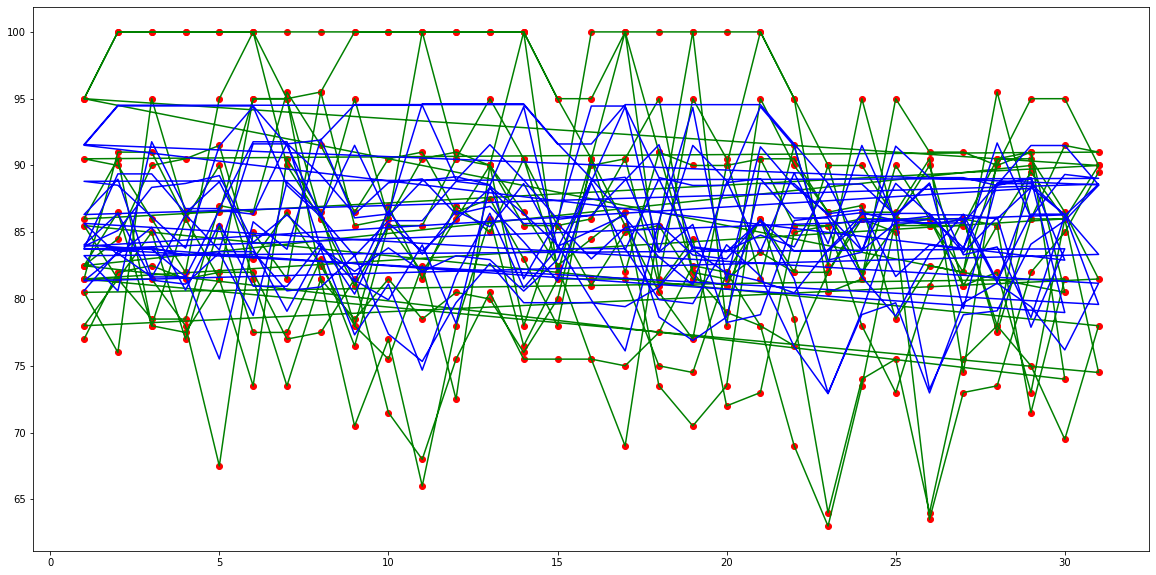

In [30]:
plt.figure(figsize=(20,10))
plt.scatter(X_test['Day'],Y_test,color='red')
plt.plot(X_test['Day'],Y_test,color='green')
plt.plot(X_test['Day'],Y_pred,color='blue')

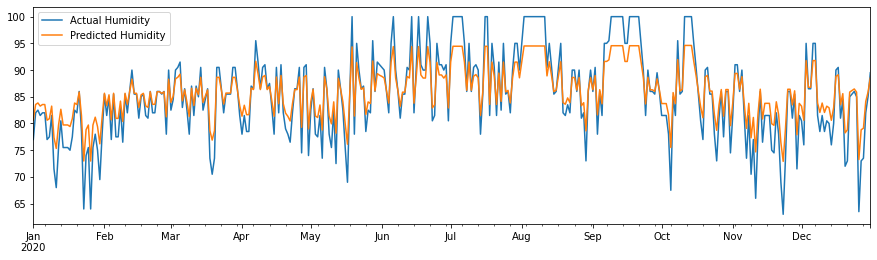

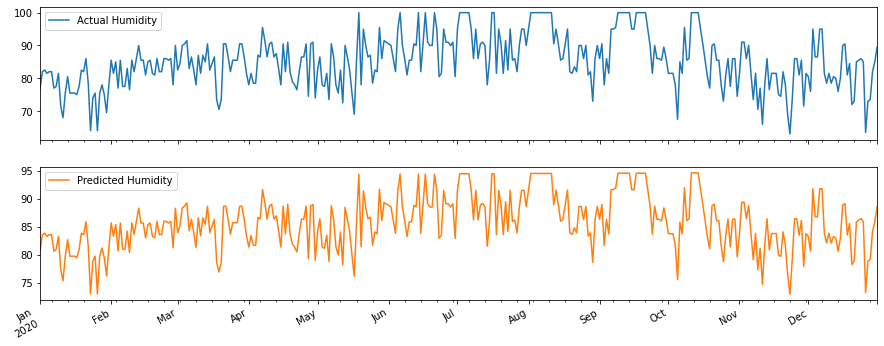

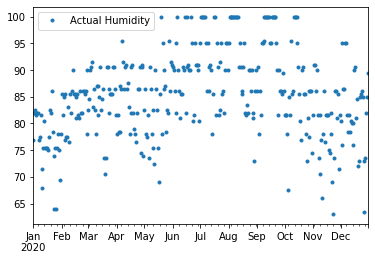

In [31]:
df1.plot(figsize=(15,4))
df1.plot(subplots=True, figsize=(15,6))
df1.plot( y=["Actual Humidity"], style='.')

In [32]:
from sklearn.metrics import r2_score 
r2 = r2_score(Y_test, Y_pred) 
r2

0.8297628360969753

In [33]:
from sklearn.metrics import mean_absolute_error as mae

mae(Y_test, Y_pred,multioutput='uniform_average')

2.634358996242932

In [34]:
import math
MSE = np.square(np.subtract(Y_test, Y_pred)).mean() 
 
RMSE = math.sqrt(MSE)
RMSE

3.3100887679485216

In [35]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, Y_pred)

10.95668765169896

In [36]:
from sklearn.metrics import mean_absolute_error
mape = mean_absolute_error(Y_test, Y_pred)*100
print(mape)

263.4358996242932


In [37]:
X_train.fillna(0, inplace=True)
Y_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)
Y_test.fillna(0, inplace=True)
X_train=X_train.astype('int')
Y_train=Y_train.astype('int')
X_test=X_test.astype('int')
Y_test=Y_test.astype('int')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [38]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=365,learning_rate='adaptive')
mlp.fit(X_train,Y_train)

MLPClassifier(hidden_layer_sizes=(13, 13, 13), learning_rate='adaptive',
              max_iter=365)

In [39]:
mlp.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (13, 13, 13),
 'learning_rate': 'adaptive',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 365,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [40]:
Y_pred1 = mlp.predict(X_test)

In [41]:
df2 = pd.DataFrame({'Actual Humidity': Y_test, 'Predicted Humidity': Y_pred1})  
df2[df2['Predicted Humidity']>=1].head(10)

,Actual Humidity,Predicted Humidity
2020-01-01,77,77
2020-01-02,82,81
2020-01-03,82,81
2020-01-04,81,81
2020-01-05,82,81
2020-01-06,82,81
2020-01-07,77,77
2020-01-08,77,77
2020-01-09,81,81
2020-01-10,71,71


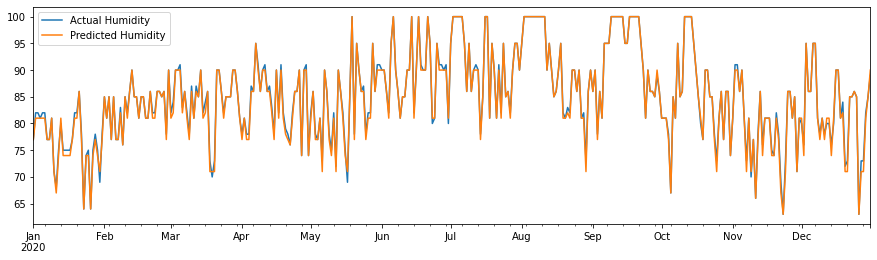

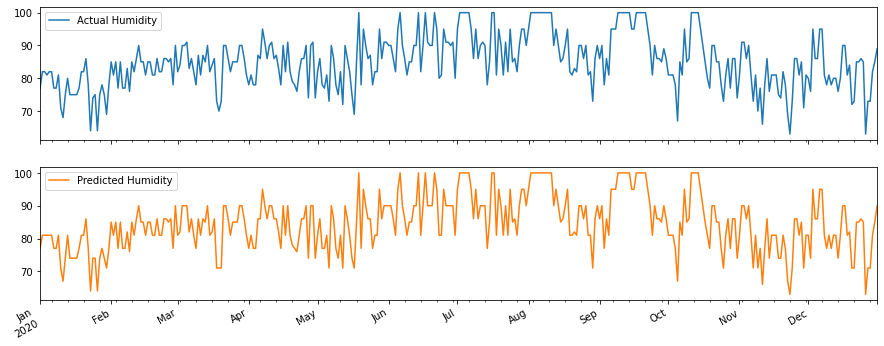

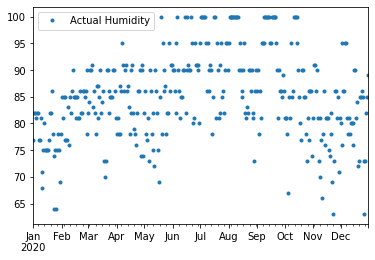

In [42]:
df2.plot(figsize=(15,4))
df2.plot(subplots=True, figsize=(15,6))
df2.plot( y=["Actual Humidity"], style='.')

In [43]:
from sklearn.metrics import r2_score 
r2 = r2_score(Y_test, Y_pred1) 
r2

0.9925312457819107

In [44]:
from sklearn.metrics import mean_absolute_error as mae

mae(Y_test, Y_pred1,multioutput='uniform_average')

0.38524590163934425

In [45]:
import math
MSE = np.square(np.subtract(Y_test, Y_pred1)).mean() 
 
RMSE = math.sqrt(MSE)
RMSE

0.6993361411019497

In [46]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, Y_pred1)

0.4890710382513661

In [47]:
from sklearn import svm
from sklearn.svm import SVC
model = svm.SVC(gamma='scale',kernel='poly',degree=12)
model.fit(X_train, Y_train)

SVC(degree=12, kernel='poly')

In [48]:
model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 12,
 'gamma': 'scale',
 'kernel': 'poly',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [49]:
Y_test

2020-01-01    77
2020-01-02    82
2020-01-03    82
2020-01-04    81
2020-01-05    82
              ..
2020-12-27    73
2020-12-28    73
2020-12-29    82
2020-12-30    85
2020-12-31    89
Name: Humidity, Length: 366, dtype: int32

In [50]:
Y_pred2 = model.predict(X_test)

In [51]:
df3 = pd.DataFrame({'Actual Humidity': Y_test, 'Predicted Humidity': Y_pred2})  
df3[df3['Predicted Humidity']!=0].head(10)

,Actual Humidity,Predicted Humidity
2020-01-01,77,77
2020-01-02,82,81
2020-01-03,82,81
2020-01-04,81,81
2020-01-05,82,81
2020-01-06,82,81
2020-01-07,77,77
2020-01-08,77,77
2020-01-09,81,81
2020-01-10,71,73


In [52]:
Y_test

2020-01-01    77
2020-01-02    82
2020-01-03    82
2020-01-04    81
2020-01-05    82
              ..
2020-12-27    73
2020-12-28    73
2020-12-29    82
2020-12-30    85
2020-12-31    89
Name: Humidity, Length: 366, dtype: int32

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002DB48A8BAC0>,
      dtype=object)

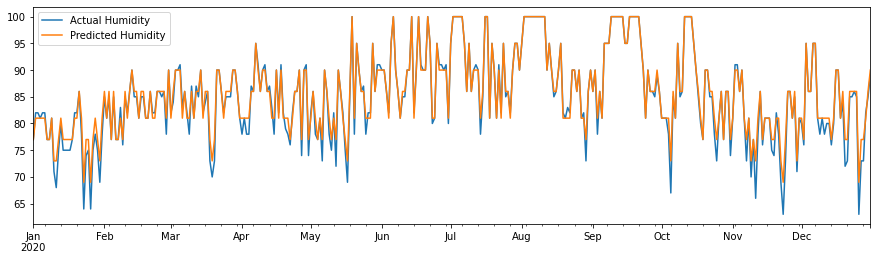

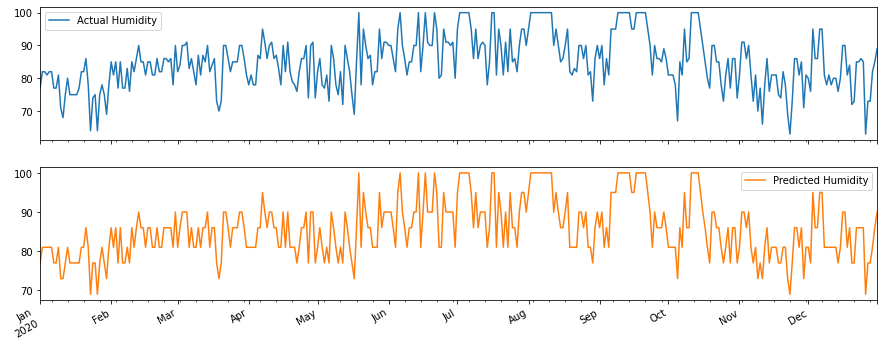

In [53]:
df3.plot(figsize=(15,4))
df3.plot(subplots=True, figsize=(15,6))

In [54]:
r2 = r2_score(Y_test, Y_pred2) 
r2

0.9611958579730553

In [55]:
from sklearn.metrics import mean_absolute_error as mae

mae(Y_test, Y_pred2,multioutput='uniform_average')

0.8907103825136612

In [56]:
import math
MSE = np.square(np.subtract(Y_test, Y_pred2)).mean() 
 
RMSE = math.sqrt(MSE)
RMSE

1.5940463000042933

In [57]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, Y_pred2)

2.540983606557377

In [58]:
from sklearn.neighbors import KNeighborsClassifier
neig = KNeighborsClassifier(n_neighbors=6)
neig.fit(X_train,Y_train)


KNeighborsClassifier(n_neighbors=6)

In [59]:
neig.get_params()


{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 6,
 'p': 2,
 'weights': 'uniform'}

In [60]:
Y_test3 = test['Humidity']
Y_pred3 = neig.predict(X_test)

In [61]:
df4 = pd.DataFrame({'Actual Humidity': Y_test, 'Predicted Humidity': Y_pred3})  
df4[df4['Predicted Humidity']>=1].head(10)

,Actual Humidity,Predicted Humidity
2020-01-01,77,78
2020-01-02,82,82
2020-01-03,82,82
2020-01-04,81,82
2020-01-05,82,78
2020-01-06,82,78
2020-01-07,77,77
2020-01-08,77,77
2020-01-09,81,78
2020-01-10,71,73


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002DB49210A00>,
      dtype=object)

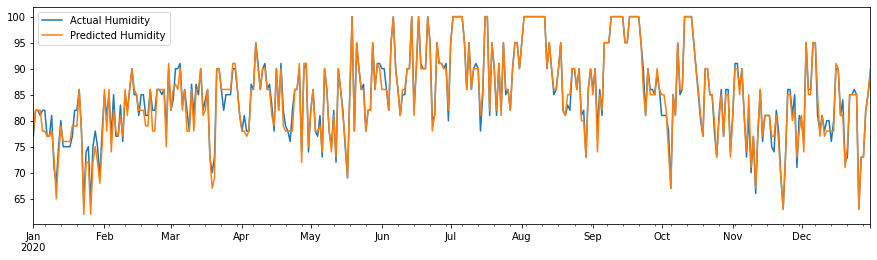

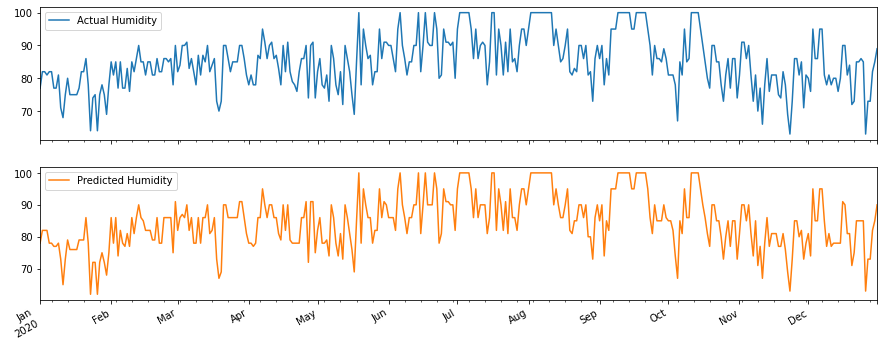

In [62]:
df4.plot(figsize=(15,4))
df4.plot(subplots=True, figsize=(15,6))

In [63]:
r2 = r2_score(Y_test, Y_pred3) 
r2

0.9693322103335437

In [64]:
from sklearn.metrics import mean_absolute_error as mae

mae(Y_test, Y_pred3,multioutput='uniform_average')

0.8333333333333334

In [65]:
import math
MSE = np.square(np.subtract(Y_test, Y_pred3)).mean() 
 
RMSE = math.sqrt(MSE)
RMSE

1.417108577813103

In [66]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, Y_pred3)

2.0081967213114753